# Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
from workflow.preprocessing import preprocess
from workflow.model import init_model, compile_model, fit_model, evaluate_model, predict
from workflow.model_evaluation import train_test_split, get_X_y, cross_validate

2022-12-05 16:17:59.122800: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Data

In [3]:
PA75016_df = pd.read_csv("../../data/pollution/2_Processed/PA75016.csv").copy()
PA75016_df

,Date_time,PM25,PM10,NO2,O3,SO2,Station_name,Station_type
0,2018/01/01 01:00:00+00,NaN,NaN,NaN,NaN,NaN,75016 - Porte Auteuil,Traffic
1,2018/01/01 02:00:00+00,NaN,NaN,NaN,NaN,NaN,75016 - Porte Auteuil,Traffic
2,2018/01/01 03:00:00+00,NaN,NaN,NaN,NaN,NaN,75016 - Porte Auteuil,Traffic
3,2018/01/01 04:00:00+00,NaN,NaN,NaN,NaN,NaN,75016 - Porte Auteuil,Traffic
4,2018/01/01 05:00:00+00,NaN,NaN,NaN,NaN,NaN,75016 - Porte Auteuil,Traffic
...,...,...,...,...,...,...,...,...
42571,2022/11/14 20:00:00+00,14.5,18.8,41.5,NaN,NaN,75016 - Porte Auteuil,Traffic
42572,2022/11/14 21:00:00+00,NaN,NaN,34.5,NaN,NaN,75016 - Porte Auteuil,Traffic
42573,2022/11/14 22:00:00+00,NaN,NaN,NaN,NaN,NaN,75016 - Porte Auteuil,Traffic
42574,2022/11/14 23:00:00+00,NaN,NaN,NaN,NaN,NaN,75016 - Porte Auteuil,Traffic


In [4]:
df = preprocess(PA75016_df)
df

You have dropped O3 with 100.0% of NA
You have dropped SO2 with 40.2% of NA
['PM25', 'PM10', 'NO2', 3]
DataFrame is processed, you can play with it !


,PM25,PM10,NO2,Pollution_peak,ATMO,sin_Month,cos_Month,sin_day,cos_day,confinement
Date_time,,,,,,,,,,
2018-01-01,-0.001422,-0.048074,-0.840686,0.0,0,0.000000,1.0,-0.781831,0.623490,0
2018-01-02,-0.001422,-0.048074,-0.840686,0.0,0,0.000000,1.0,0.000000,1.000000,0
2018-01-03,-0.001422,-0.048074,-0.840686,0.0,0,0.000000,1.0,0.781831,0.623490,0
2018-01-04,-0.001422,-0.048074,-0.840686,0.0,0,0.000000,1.0,0.974928,-0.222521,0
2018-01-05,-0.025605,-0.131895,-0.840686,0.0,0,0.000000,1.0,0.433884,-0.900969,0
...,...,...,...,...,...,...,...,...,...,...
2022-11-09,-0.504979,-0.603390,-0.507353,0.0,0,-0.866025,0.5,0.781831,0.623490,0
2022-11-10,0.012802,-0.389522,-0.465686,0.0,0,-0.866025,0.5,0.974928,-0.222521,0
2022-11-11,-0.315789,-0.951002,-1.296569,0.0,0,-0.866025,0.5,0.433884,-0.900969,0


In [5]:
df = df.drop(columns=['Pollution_peak', 'sin_Month', 'cos_Month', 'sin_day', 'cos_day', 'confinement'])
df

,PM25,PM10,NO2,ATMO
Date_time,,,,
2018-01-01,-0.001422,-0.048074,-0.840686,0
2018-01-02,-0.001422,-0.048074,-0.840686,0
2018-01-03,-0.001422,-0.048074,-0.840686,0
2018-01-04,-0.001422,-0.048074,-0.840686,0
2018-01-05,-0.025605,-0.131895,-0.840686,0
...,...,...,...,...
2022-11-09,-0.504979,-0.603390,-0.507353,0
2022-11-10,0.012802,-0.389522,-0.465686,0
2022-11-11,-0.315789,-0.951002,-1.296569,0


In [6]:
df['ATMO'].value_counts()

1    675
2    639
0    461
Name: ATMO, dtype: int64

In [7]:
df.describe()

,PM25,PM10,NO2,ATMO
count,1775.000000,1775.000000,1775.000000,1775.000000
mean,0.287425,0.161112,0.093362,1.100282
std,1.009216,0.818783,0.780630,0.781029
min,-1.421053,-1.356549,-2.125000,0.000000
25%,-0.368421,-0.424037,-0.470588,0.000000
50%,0.000000,0.000000,0.000000,1.000000
75%,0.631579,0.575963,0.529412,2.000000
max,6.728307,4.478274,4.426471,2.000000


# Cross-validate

Folds shape: (7, 521, 4)
The function generated 7 folds.
Each fold has a shape equal to (521, 4).


Fold n°1
Split-set shape:
X: (352, 7, 4), y: (352, 7)
Split-set shape:
X: (150, 7, 4), y: (150, 7)
--------------------------------------------------


2022-12-05 16:18:04.248949: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


fit_model executed in 27.03 seconds, using up to 21.37MB of RAM


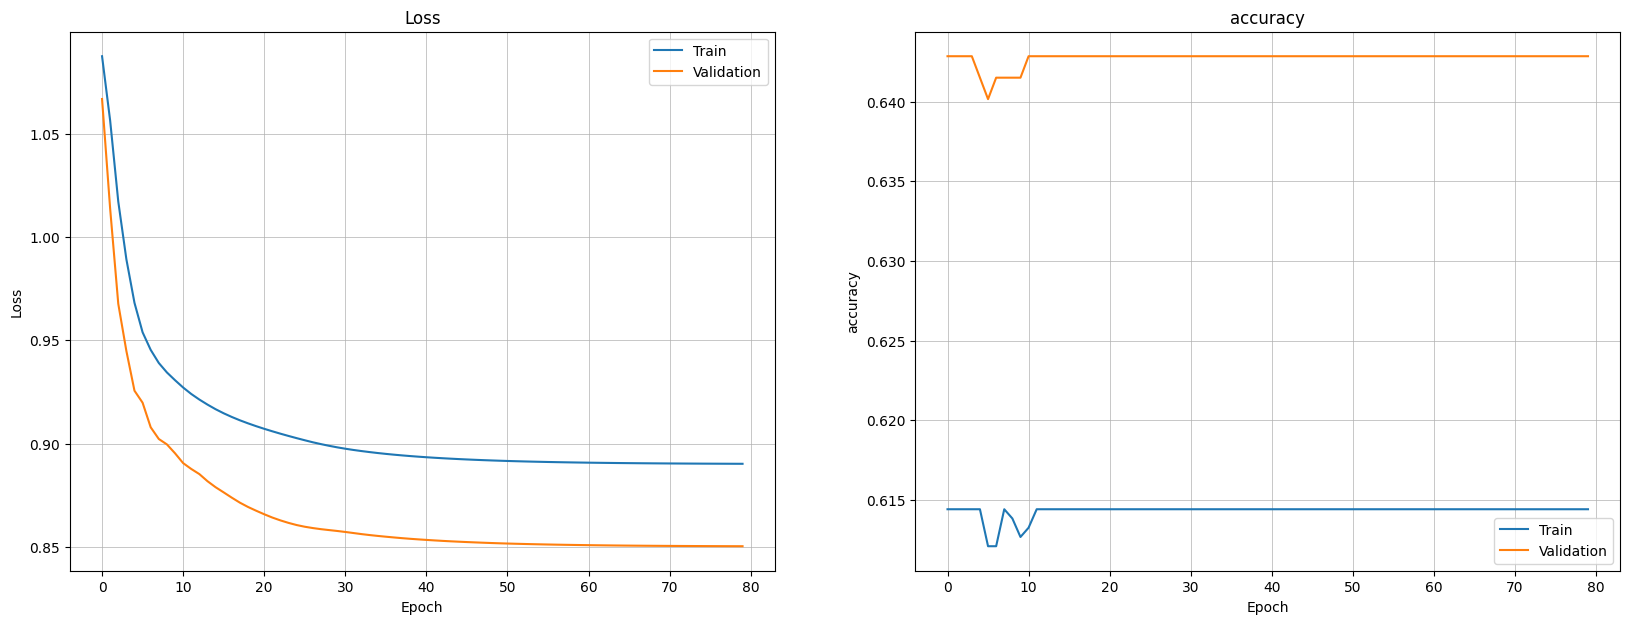

5/5 [==============================] - 0s 6ms/step - loss: 0.8226 - sparse_categorical_accuracy: 0.6562
✅ Model evaluated: loss 0.82 accuracy 0.66


Accuracy baseline fold n°1 = 0.39
Accuracy LSTM fold n°1 = 0.66
🏋🏽‍♂️ Improvement/Decrease vs. Baseline: 67.56 % 

Fold n°2
Split-set shape:
X: (352, 7, 4), y: (352, 7)
Split-set shape:
X: (150, 7, 4), y: (150, 7)
--------------------------------------------------
fit_model executed in 25.64 seconds, using up to 19.4MB of RAM


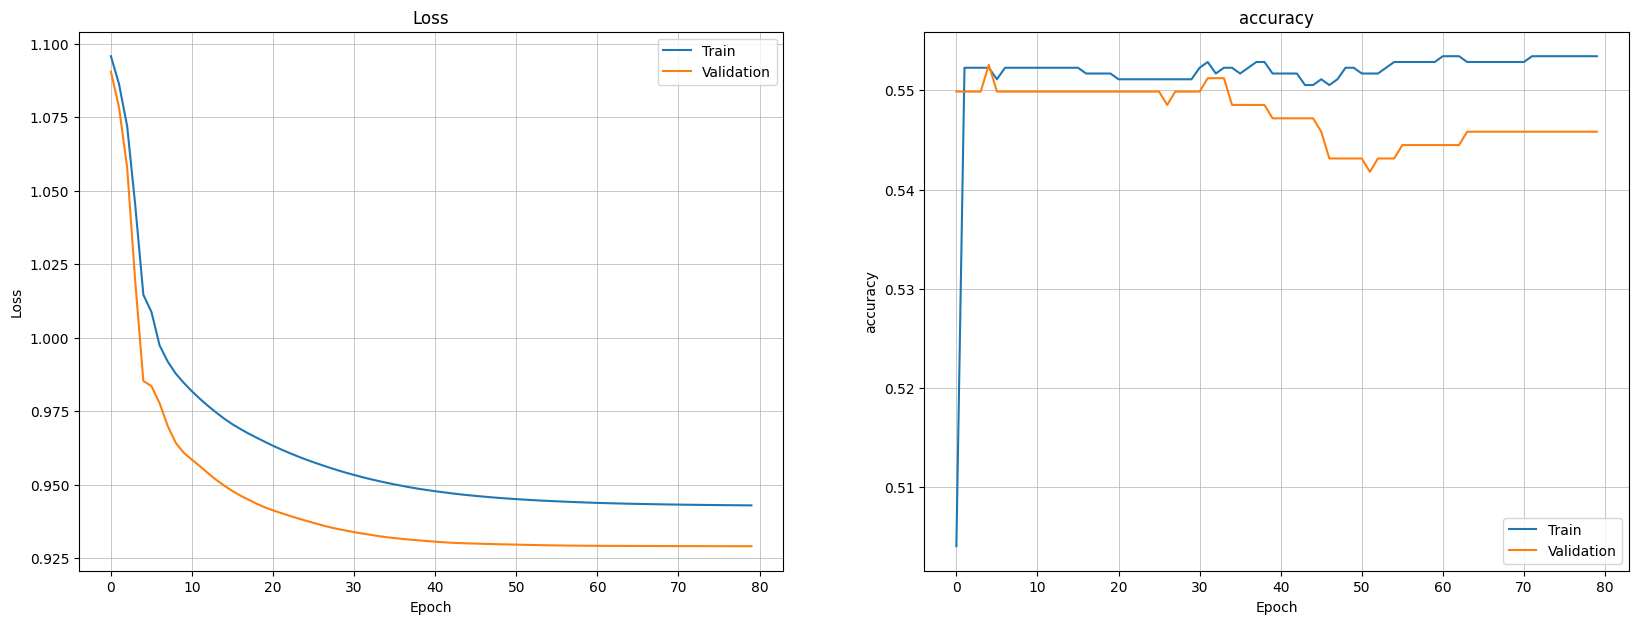

5/5 [==============================] - 0s 6ms/step - loss: 1.3727 - sparse_categorical_accuracy: 0.2286
✅ Model evaluated: loss 1.37 accuracy 0.23


Accuracy baseline fold n°2 = 0.39
Accuracy LSTM fold n°2 = 0.23
🏋🏽‍♂️ Improvement/Decrease vs. Baseline: -41.64 % 

Fold n°3
Split-set shape:
X: (352, 7, 4), y: (352, 7)
Split-set shape:
X: (150, 7, 4), y: (150, 7)
--------------------------------------------------
fit_model executed in 17.44 seconds, using up to 19.18MB of RAM


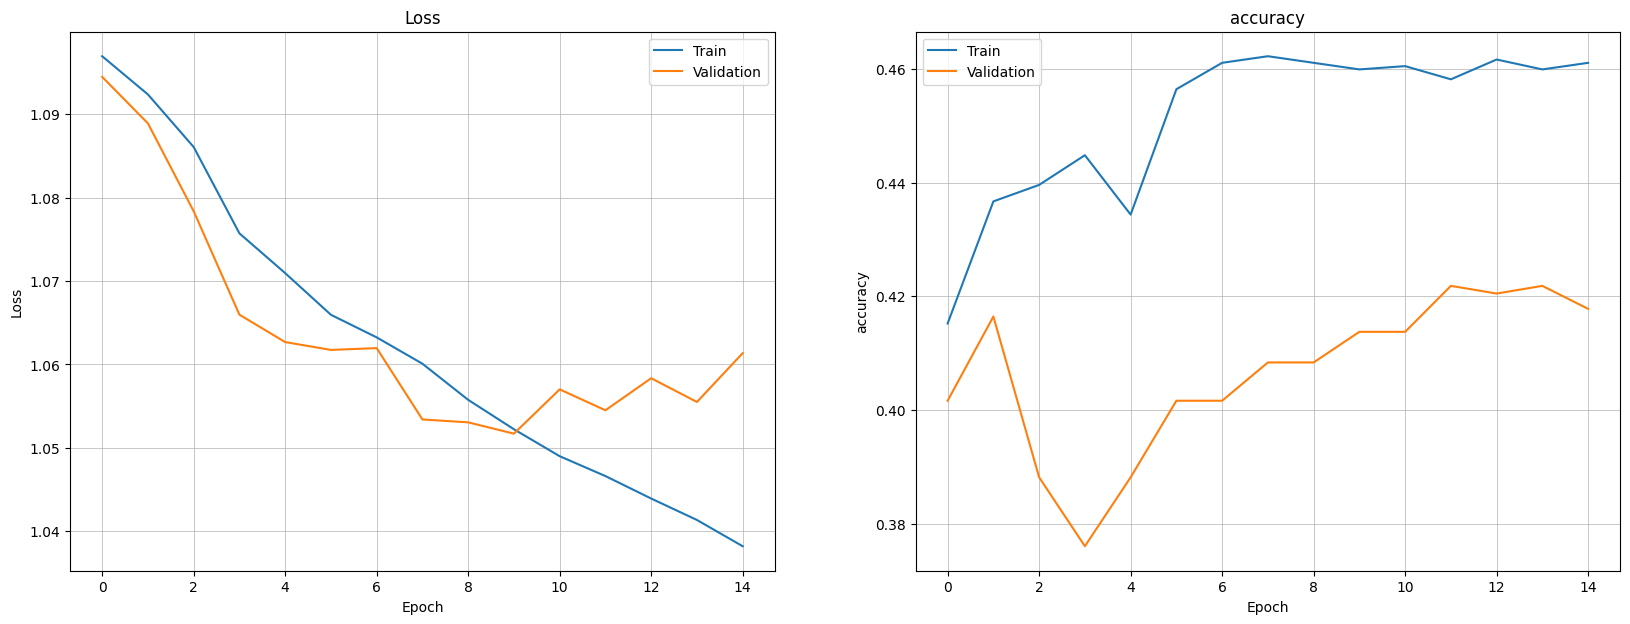

5/5 [==============================] - 0s 6ms/step - loss: 1.1086 - sparse_categorical_accuracy: 0.3762
✅ Model evaluated: loss 1.11 accuracy 0.38


Accuracy baseline fold n°3 = 0.39
Accuracy LSTM fold n°3 = 0.38
🏋🏽‍♂️ Improvement/Decrease vs. Baseline: -3.94 % 

Fold n°4
Split-set shape:
X: (352, 7, 4), y: (352, 7)
Split-set shape:
X: (150, 7, 4), y: (150, 7)
--------------------------------------------------
fit_model executed in 21.64 seconds, using up to 19.35MB of RAM


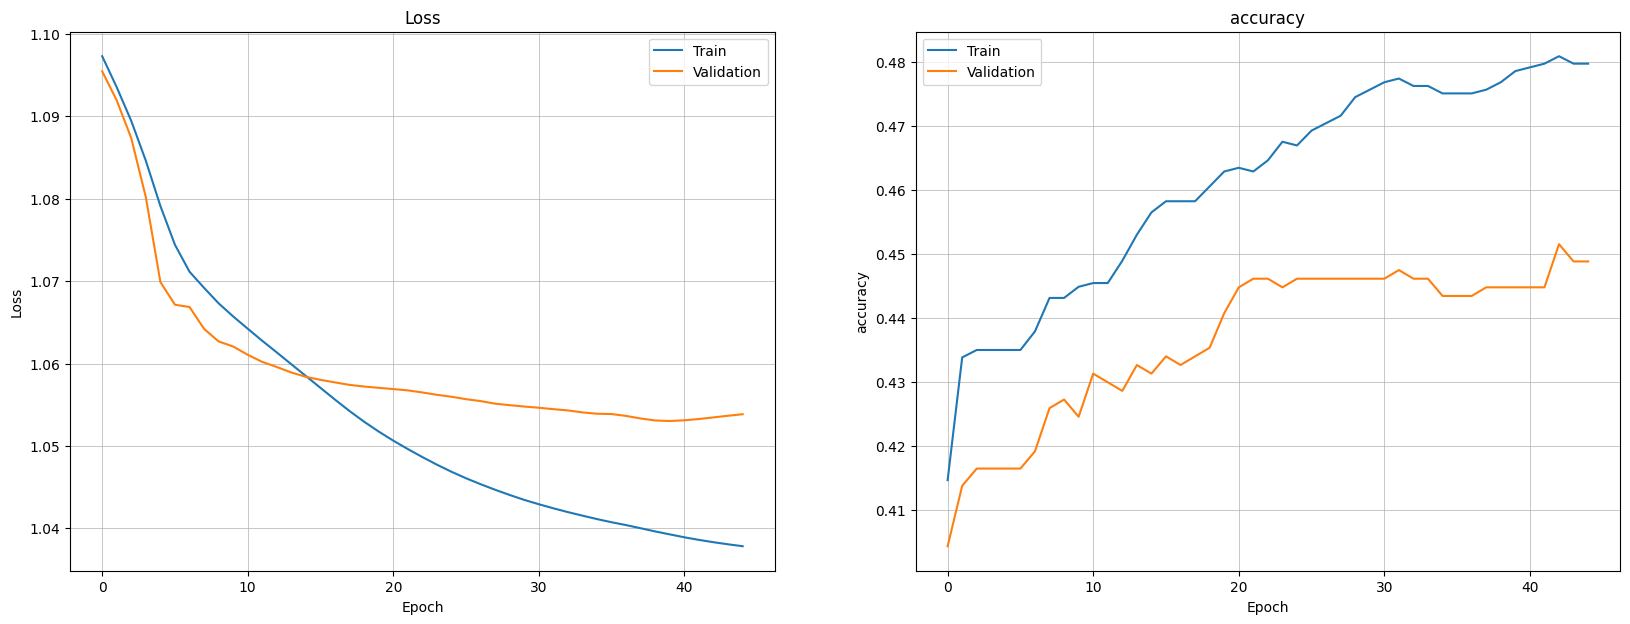

5/5 [==============================] - 0s 6ms/step - loss: 1.1862 - sparse_categorical_accuracy: 0.3724
✅ Model evaluated: loss 1.19 accuracy 0.37


Accuracy baseline fold n°4 = 0.39
Accuracy LSTM fold n°4 = 0.37
🏋🏽‍♂️ Improvement/Decrease vs. Baseline: -4.91 % 

Fold n°5
Split-set shape:
X: (352, 7, 4), y: (352, 7)
Split-set shape:
X: (150, 7, 4), y: (150, 7)
--------------------------------------------------
fit_model executed in 17.15 seconds, using up to 19.16MB of RAM


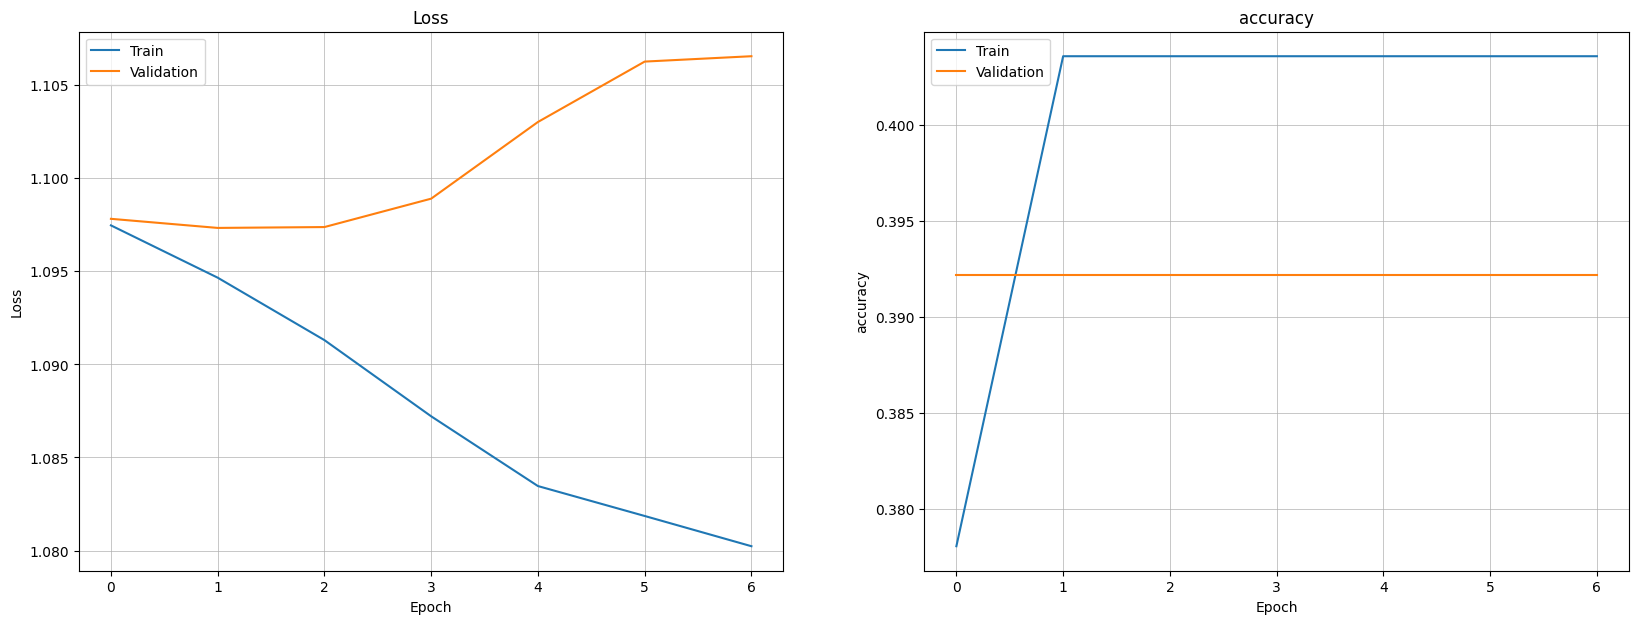

5/5 [==============================] - 0s 6ms/step - loss: 1.0890 - sparse_categorical_accuracy: 0.4038
✅ Model evaluated: loss 1.09 accuracy 0.4


Accuracy baseline fold n°5 = 0.39
Accuracy LSTM fold n°5 = 0.4
🏋🏽‍♂️ Improvement/Decrease vs. Baseline: 3.11 % 

Fold n°6
Split-set shape:
X: (352, 7, 4), y: (352, 7)
Split-set shape:
X: (150, 7, 4), y: (150, 7)
--------------------------------------------------
fit_model executed in 17.23 seconds, using up to 19.16MB of RAM


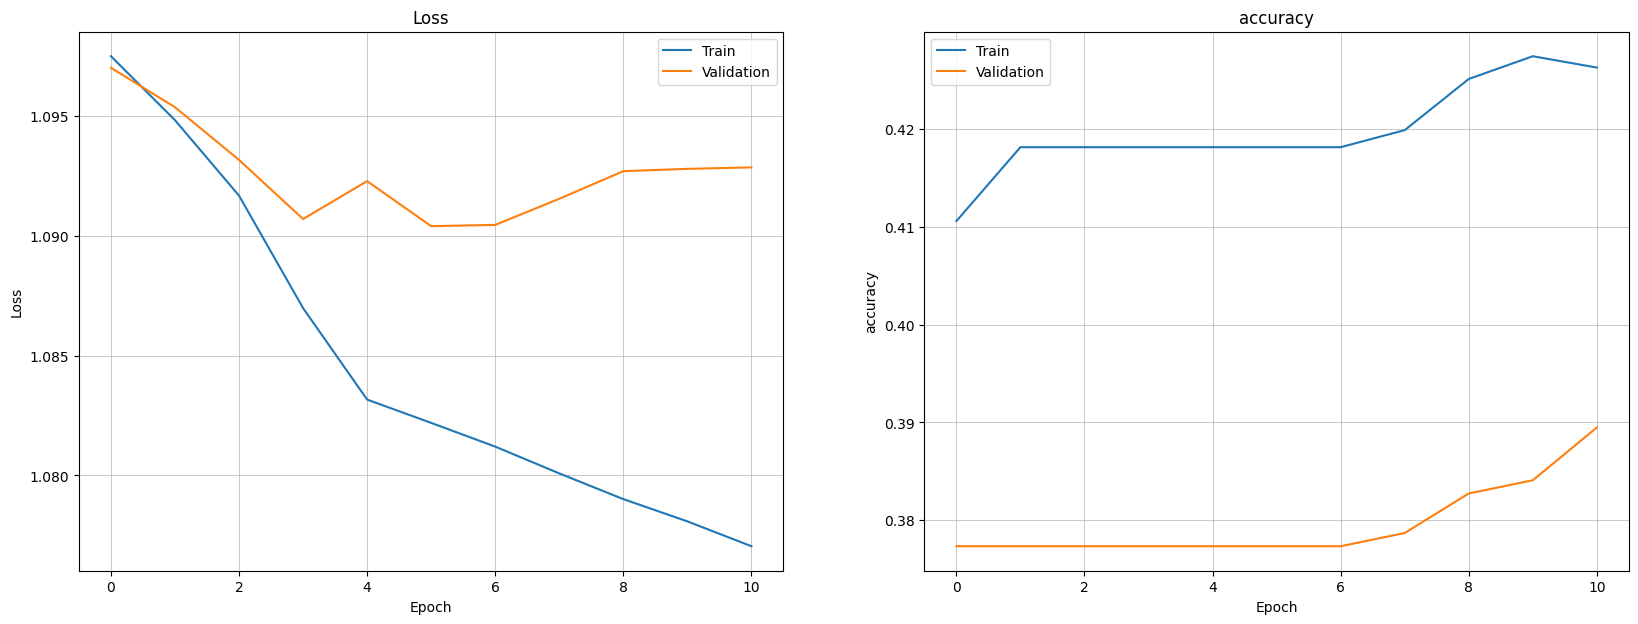

5/5 [==============================] - 0s 6ms/step - loss: 1.0792 - sparse_categorical_accuracy: 0.4962
✅ Model evaluated: loss 1.08 accuracy 0.5


Accuracy baseline fold n°6 = 0.39
Accuracy LSTM fold n°6 = 0.5
🏋🏽‍♂️ Improvement/Decrease vs. Baseline: 26.7 % 

Fold n°7
Split-set shape:
X: (352, 7, 4), y: (352, 7)
Split-set shape:
X: (150, 7, 4), y: (150, 7)
--------------------------------------------------
fit_model executed in 20.66 seconds, using up to 19.21MB of RAM


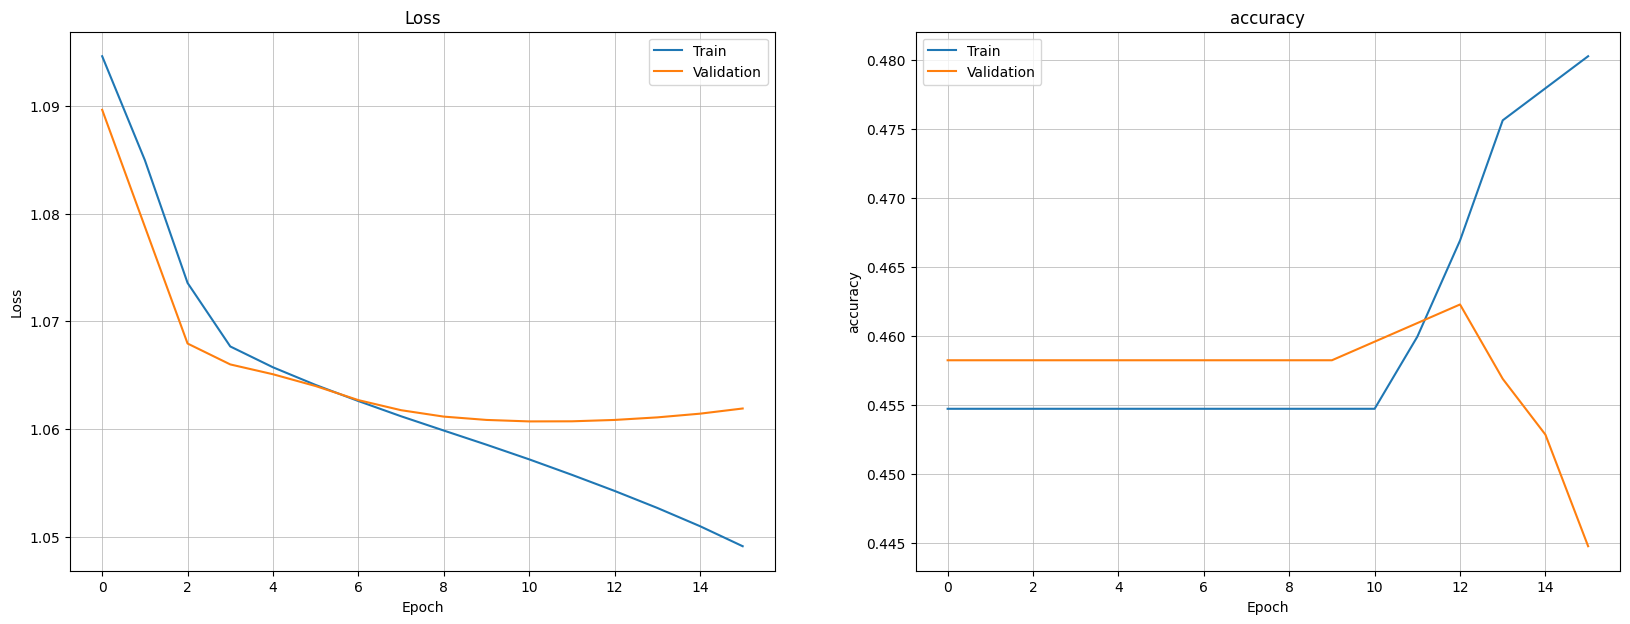

5/5 [==============================] - 0s 6ms/step - loss: 1.1006 - sparse_categorical_accuracy: 0.3505
✅ Model evaluated: loss 1.1 accuracy 0.35


Accuracy baseline fold n°7 = 0.39
Accuracy LSTM fold n°7 = 0.35
🏋🏽‍♂️ Improvement/Decrease vs. Baseline: -10.51 % 

Result for all folds
Average accuracy baseline = 0.39
Average accuracy LSTM = 0.41
🏋🏽‍♂️ Improvement/Decrease vs. Baseline: 5.2 % 



In [8]:
cross_validate(df)

# Model training

In [9]:
from workflow.params import FOLD_LENGTH, FOLD_STRIDE, STRIDE, TRAIN_TEST_RATIO, N_FEATURES, INPUT_LENGTH, TARGET, TARGET_COLUMN_IDX, N_TARGETS, OUTPUT_LENGTH, HORIZON

In [10]:
# (df_train, df_test) = train_test_split(fold = df,
#                                         train_test_ratio = TRAIN_TEST_RATIO,
#                                         input_length = INPUT_LENGTH,
#                                         horizon = HORIZON)

In [11]:
df_train.shape, df_test.shape

((1242, 4), (540, 4))

In [12]:
# X_train, y_train = get_X_y(fold = df_train,
#                         horizon = HORIZON,
#                         input_length = INPUT_LENGTH,
#                         output_length = OUTPUT_LENGTH,
#                         stride = STRIDE)

# X_test, y_test = get_X_y(fold = df_test,
#                         horizon = HORIZON,
#                         input_length = INPUT_LENGTH,
#                         output_length = OUTPUT_LENGTH,
#                         stride = STRIDE)

Split-set shape:
X: (1229, 7, 4), y: (1229, 7)
Split-set shape:
X: (527, 7, 4), y: (527, 7)


In [30]:
X = df.drop(columns=['ATMO'])
y = df['ATMO']

In [13]:
model = init_model(X, y)
compile_model(model)
model, history = fit_model(model, X, y)

fit_model executed in 47.35 seconds, using up to 19.5MB of RAM


In [14]:
# res = evaluate_model(model, X_test, y_test)
# res

17/17 [==============================] - 0s 9ms/step - loss: 1.1336 - sparse_categorical_accuracy: 0.3047
✅ Model evaluated: loss 1.13 accuracy 0.3


[1.1336301565170288, 0.3046896159648895]

# Prediction

In [15]:
y_pred_proba = predict(model, X_new)

17/17 [==============================] - 2s 9ms/step


In [16]:
y_pred_proba

array([[[0.3 , 0.35, 0.36],
        [0.28, 0.36, 0.37],
        [0.25, 0.36, 0.39],
        ...,
        [0.21, 0.39, 0.4 ],
        [0.22, 0.43, 0.35],
        [0.27, 0.47, 0.26]],

       [[0.3 , 0.35, 0.35],
        [0.3 , 0.36, 0.35],
        [0.3 , 0.36, 0.34],
        ...,
        [0.32, 0.37, 0.31],
        [0.35, 0.38, 0.27],
        [0.37, 0.42, 0.21]],

       [[0.29, 0.35, 0.36],
        [0.26, 0.35, 0.39],
        [0.2 , 0.34, 0.46],
        ...,
        [0.08, 0.27, 0.64],
        [0.07, 0.33, 0.61],
        [0.07, 0.46, 0.46]],

       ...,

       [[0.3 , 0.35, 0.35],
        [0.3 , 0.36, 0.35],
        [0.3 , 0.36, 0.34],
        ...,
        [0.31, 0.37, 0.32],
        [0.33, 0.37, 0.29],
        [0.37, 0.38, 0.25]],

       [[0.3 , 0.35, 0.35],
        [0.28, 0.36, 0.36],
        [0.27, 0.36, 0.37],
        ...,
        [0.27, 0.39, 0.34],
        [0.3 , 0.4 , 0.31],
        [0.33, 0.4 , 0.27]],

       [[0.3 , 0.35, 0.35],
        [0.28, 0.36, 0.36],
        [0.27, 0

In [17]:
y_pred_proba[-1]

array([[0.3 , 0.35, 0.35],
       [0.28, 0.36, 0.36],
       [0.27, 0.36, 0.37],
       [0.26, 0.37, 0.37],
       [0.26, 0.39, 0.35],
       [0.28, 0.4 , 0.33],
       [0.31, 0.4 , 0.29]], dtype=float32)

In [18]:
from workflow.baseline import baseline

accuracy = baseline(df)
accuracy

0.3916242218449349

In [19]:
index_list = []
for i in range(0,7):
    index_max = list(np.argmax(y_pred_proba[:,i,:], axis=1))
    index_list.append(index_max)

In [20]:
pd.DataFrame(np.array(index_list)).head(15)

,0,1,2,3,4,5,6,7,8,9,...,517,518,519,520,521,522,523,524,525,526
0,2,1,2,1,2,1,2,1,1,1,...,1,1,1,2,1,1,1,1,1,1
1,2,1,2,1,2,1,2,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2,2,1,2,1,2,1,2,2,1,1,...,1,1,1,2,1,2,1,1,2,2
3,2,1,2,2,2,1,2,1,1,1,...,1,1,1,2,1,2,1,1,1,1
4,2,1,2,2,2,1,2,1,1,1,...,1,1,1,2,1,2,1,1,1,1
5,1,1,2,2,2,1,2,1,1,1,...,1,1,1,2,1,2,1,1,1,1
6,1,1,1,2,1,0,2,1,1,1,...,1,1,0,2,1,2,1,1,1,1


In [21]:
pd.DataFrame(np.reshape(np.ravel(np.array(index_list).T),(527,7)))

,0,1,2,3,4,5,6
0,2,2,2,2,2,1,1
1,1,1,1,1,1,1,1
2,2,2,2,2,2,2,1
3,1,1,1,2,2,2,2
4,2,2,2,2,2,2,1
...,...,...,...,...,...,...,...
522,1,1,2,2,2,2,2
523,1,1,1,1,1,1,1
524,1,1,1,1,1,1,1
525,1,1,2,1,1,1,1


In [22]:
y_true.shape

(527, 7)

In [23]:
y_true = np.ravel(y_true)

In [24]:
y_true.shape

(3689,)

In [25]:
np.array(index_list).shape

(7, 527)

In [26]:
y_pred = np.ravel(np.array(index_list).T)
y_pred.shape

(3689,)

In [27]:
from sklearn.metrics import accuracy_score

accuracy_f = accuracy_score(y_true, y_pred)
accuracy_f

0.33288153971265927

# Confusion matrix (to finish)

In [28]:
results_df = pd.DataFrame({"actual": y_true,
                           "predicted": y_pred})

confusion_matrix = pd.crosstab(index= results_df['actual'],
                               columns = results_df['predicted'])

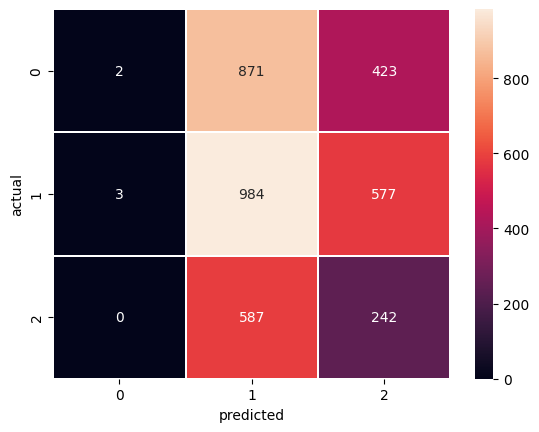

In [29]:
#Create a Confusion Matrix heatmap from the above data
import seaborn as sns
sns.heatmap(confusion_matrix, annot=True, fmt=".0f", linewidths = 0.01);

In [31]:
confusion_matrix

predicted,0,1,2
actual,,,
0,2,871,423
1,3,984,577
2,0,587,242
